In [271]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
pd.options.display.max_rows = 999

In [325]:
!pip install lyricsgenius

In [322]:
df = pd.DataFrame({"Antal veckor": [], "Artist": [], "Nr": [], "Poäng": [], "Titel":[]})
raw_lst = pd.read_html(f"https://sv.wikipedia.org/wiki/Svensktoppen_1962")
df = df.append(raw_lst[0])
#for year in range(1963,1970):
 #   raw_lst = []
  #  raw_lst = pd.read_html(f"https://sv.wikipedia.org/wiki/Svensktoppen_{year}")
    
    
    
   # raw_lst[0].columns = range(raw_lst[0].columns.size)
    
    #df = df.append(raw_lst[0])
#df = df.drop_duplicates()
#df = df.reindex()



In [323]:
df

,Antal veckor,Artist,Nr,Poäng,Titel,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN,"Inga poäng finns tillgängliga för veckorna 43,...","Inga poäng finns tillgängliga för veckorna 43,...","Inga poäng finns tillgängliga för veckorna 43,...","Inga poäng finns tillgängliga för veckorna 43,...","Inga poäng finns tillgängliga för veckorna 43,..."
1,NaN,NaN,NaN,NaN,NaN,Nr,Artist,Titel,Poäng,Antal veckor
2,NaN,NaN,NaN,NaN,NaN,1,Anna-Lena Löfgren,Regniga natt *,186,6
3,NaN,NaN,NaN,NaN,NaN,2,Jan Höiland,En natt i Moskva *,177,11
4,NaN,NaN,NaN,NaN,NaN,3,Inger Berggren,Elisabeth serenad[3]*,157,11
5,NaN,NaN,NaN,NaN,NaN,4,Lars Lönndahl,Midnattstango *,146,11
6,NaN,NaN,NaN,NaN,NaN,5,Ann-Louise Hanson,Vita rosor från Aten *,113,11
7,NaN,NaN,NaN,NaN,NaN,6,Jan Malmsjö,Caterina *,89,9
8,NaN,NaN,NaN,NaN,NaN,7,Thore Skogman,Dalatwist *,38,5
9,NaN,NaN,NaN,NaN,NaN,8,Systrarna Lindberg,Solen lyser även på en liten stuga,34,3


In [288]:
# Get the Svensktoppen artist + song title based on year
raw_lst  = []
for year in range(1962,1963):
     

    top_m_url = f"https://sv.wikipedia.org/wiki/Svensktoppen_{year}"
    r = requests.get(top_m_url)
    html = r.content
    soup = BeautifulSoup(html)
    soup

  #  print(len([i.text for i in soup.select("table.wikitable a ")]))
    lst = [i.text for i in soup.select("table.wikitable a ")]
    raw_lst.extend(lst)
print(raw_lst)

['Anna-Lena Löfgren', 'Regniga natt', 'Jan Höiland', 'En natt i Moskva', 'Inger Berggren', 'Elisabeth serenad', '[3]', 'Lars Lönndahl', 'Midnattstango', 'Ann-Louise Hanson', 'Vita rosor från Aten', 'Jan Malmsjö', 'Caterina', 'Thore Skogman', 'Dalatwist', 'Systrarna Lindberg', 'Solen lyser även på en liten stuga', 'Anita Lindblom', 'Bara du', 'Göingeflickorna', 'Vår lyckodröm', 'Gunnar Wiklund', 'Gina', 'Lill-Babs', 'Att vara förälskad', 'Dra ända in i Hälsingland', 'Thory Bernhards', 'Gondoli Gondola', 'Lily Berglund', 'Quando, Quando, Quando']


In [289]:
# Clean list
for x, i in enumerate(raw_lst):
    if re.match(r"\D\d\D", i):
            print("pop")
            raw_lst.pop(x)


# Split list into 2
artist_lst = raw_lst[0::2]
song_lst = raw_lst[1::2]

print(len(artist_lst),artist_lst)
print(len(song_lst),song_lst)

pop
15 ['Anna-Lena Löfgren', 'Jan Höiland', 'Inger Berggren', 'Lars Lönndahl', 'Ann-Louise Hanson', 'Jan Malmsjö', 'Thore Skogman', 'Systrarna Lindberg', 'Anita Lindblom', 'Göingeflickorna', 'Gunnar Wiklund', 'Lill-Babs', 'Dra ända in i Hälsingland', 'Gondoli Gondola', 'Quando, Quando, Quando']
14 ['Regniga natt', 'En natt i Moskva', 'Elisabeth serenad', 'Midnattstango', 'Vita rosor från Aten', 'Caterina', 'Dalatwist', 'Solen lyser även på en liten stuga', 'Bara du', 'Vår lyckodröm', 'Gina', 'Att vara förälskad', 'Thory Bernhards', 'Lily Berglund']


In [286]:
df1 = pd.DataFrame(song_lst,artist_lst)

In [287]:
df1

,0
Anna-Lena Löfgren,Regniga natt
Jan Höiland,En natt i Moskva
Inger Berggren,Elisabeth serenad
Lars Lönndahl,Midnattstango
Ann-Louise Hanson,Vita rosor från Aten
Jan Malmsjö,Caterina
Thore Skogman,Dalatwist
Systrarna Lindberg,Solen lyser även på en liten stuga
Anita Lindblom,Bara du
Göingeflickorna,Vår lyckodröm


In [74]:
texten = """Jag vänder min bil mot norr, jag åker uppför kusten Det får ta den tid det tar,
jag följer den inre rösten
Mina tankar spelar fritt,
jag minner mig tillbaka
Bilderna kommer förstås,
hästarna sliter sig loss..
Jag har Stockholm bakom min rygg,
slätten har jag passerat
Långtradarna kämpar på,
jag reser som planerat
På väg mot en ljusare trakt,
där jag vet att jag hör hemma
Bilen får glida fram,
bakom hästarnas damm..
Spring, Spring, Spring, Spring, Spring
släpp hästarna fria
Spring, Spring, Spring, Spring, Spring
släpp hästarna fria
Här har jag stått i ett regn,
och liftat, vilka minnen
Mina rötter får näring igen,
det skärper mina sinnen
Det framkallar hennes ansikte,
hon som bodde här vid havet
Känslorna svävar fritt,
jag hör hästarnas skritt
Spring, Spring, Spring, Spring, Spring
släpp hästarna fria
Spring, Spring, Spring, Spring, Spring
släpp hästarna fria
Jag har länge kännt en oro,
krypande bakom min rygg
Jag har nästan tappat greppet,
om dom känslor som gör,
att jag känner mig trygg..
Spring, Spring, Spring, Spring, Spring
släpp hästarna fria
Spring, Spring, Spring, Spring, Spring
släpp hästarna fria
Jag närmar mig resans mål,
tar färjan över älven
Jag fylls av ett stilla lugn,
ser havet slå mot bergen
Snart går jag på min barndoms mark,
där min farfar var min hjälte
Jag var Indian och han,
han var hästarna som sprang
Jag var Indian och han,
han var hästarna som sprang..
Spring, Spring, Spring, Spring, Spring
släpp hästarna fria
Spring, Spring, Spring, Spring, Spring
släpp hästarna fria"""

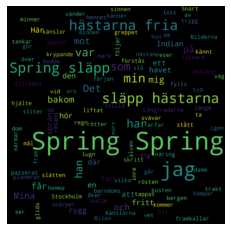

In [10]:
#Make a wordcloud
# Libraries


# Create a list of word
text=("Python Python Python Matplotlib")

# Create the wordcloud object
wordcloud = WordCloud(width=2000, height=2000, margin=0).generate(texten)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()